<a href="https://colab.research.google.com/github/Mayank-004/Timeseries-classification-using-XGBOOST/blob/main/largeKitchenappliances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [3]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib
from sklearn.metrics import auc
from numpy import abs

random.seed(786)
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,precision_recall_curve,plot_precision_recall_curve




## Importing the dataset







In [4]:
from scipy.io import arff

data = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')
testdata = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')

dataset = pd.DataFrame(data[0])

test = pd.DataFrame(testdata[0])



dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,b'1'
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,b'1'
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,b'1'
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,b'1'
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.14057

In [5]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att681,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.088484,0.017864,-0.026741,-0.031323,-0.038759,-0.006532,-0.001379,-0.018546,-0.030925,-0.082533,-0.054984,-0.089291,-0.077022,-0.088442,-0.105359,-0.030207,-0.075022,-0.083191,-0.091507,-0.103185,-0.069279,-0.081615,-0.080680,-0.084752,-0.119976,-0.128466,-0.101225,-0.088674,-0.078793,-0.110446,-0.101340,-0.105004,-0.123589,-0.125299,-0.134699,-0.133297,-0.138630,-0.135314,-0.134838,-0.172682,...,-0.022172,-0.013348,-0.025311,-0.025170,-0.055209,-0.070050,-0.097078,-0.090612,-0.071647,-0.048575,-0.015050,-0.018066,-0.017742,-0.068686,-0.065754,-0.055830,-0.061589,-0.076696,-0.083428,-0.112331,-0.106942,-0.108433,-0.121018,-0.114550,-0.155121,-0.130696,-0.155117,-0.155171,-0.125256,-0.098727,-0.072425,-0.076904,-0.070594,-0.073172,-0.084466,-0.043241,0.010751,-0.064955,-0.074110,-0.085435
std,1.790828,1.178260,0.938110,0.994872,1.028598,1.115328,1.051750,1.048959,1.019400,0.887769,0.969387,0.756822,0.832159,0.777194,0.701502,1.345180,0.840837,0.772357,0.786676,0.705338,0.835325,0.809685,0.786403,0.732449,0.578671,0.568966,0.662838,0.729613,0.754213,0.703551,0.695705,0.644071,0.612747,0.528609,0.463540,0.607980,0.621610,0.603310,0.605101,0.117208,...,0.888383,0.885785,0.865760,0.847020,0.711749,0.637284,0.580049,0.556916,0.640845,0.803914,0.898301,0.885267,0.897867,0.728228,0.718873,0.802111,0.816895,0.758411,0.719326,0.561101,0.631271,0.604087,0.576804,0.605209,0.384403,0.455227,0.276067,0.384386,0.482795,0.704004,0.850635,0.865203,0.865857,0.845686,0.819517,0.911641,1.636248,0.956432,0.922845,0.864145
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,...,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-1.575090,-0.674380,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373
25%,-0.204997,-0.204997,-0.204997,-0.204566,-0.204997,-0.204997,-0.205783,-0.204997,-0.205783,-0.206735,-0.206735,-0.205783,-0.204566,-0.204997,-0.206735,-0.204997,-0.204997,-0.204997,-0.205783,-0.204997,-0.204566,-0.205783,-0.206735,-0.205783,-0.20673

In [6]:
dataset['target'].unique()

array([b'1', b'2', b'3'], dtype=object)

In [7]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))
test['target'] = test['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))


In [53]:
# removing outliers from Data

'''from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(dataset), std(dataset)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off'''


'''# replacing outliers with mean value
for i in range(dataset.shape[1]):
  for j in range(len(dataset)):
    if dataset.iloc[j,i]<=lower[i]:
      dataset.iloc[j,i]= data_mean[i]


for i in range(dataset.shape[1]):
  for j in range(len(dataset)):
    if dataset.iloc[j,i]>=upper[i]:
      dataset.iloc[j,i]= data_mean[i]'''

In [31]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,-0.090817,-0.139886,-0.139881,-0.153371,-0.170988,-0.159186,-0.166729,-0.152910,-0.160495,-0.171169,-0.178222,-0.170126,-0.167577,-0.173305,-0.183368,-0.171055,-0.166033,-0.173727,-0.177667,-0.176213,-0.166501,-0.169006,-0.166452,-0.165774,-0.175223,-0.177297,-0.172876,-0.170639,-0.166428,-0.181470,-0.171669,-0.174169,-0.176712,-0.175865,-0.173446,-0.169440,-0.177943,-0.171649,-0.170990,-0.177848,...,-0.151553,-0.162546,-0.153874,-0.157703,-0.157198,-0.169493,-0.160459,-0.165172,-0.163561,-0.160549,-0.160346,-0.163600,-0.168806,-0.169674,-0.166296,-0.170169,-0.178269,-0.169726,-0.170961,-0.174336,-0.172348,-0.171032,-0.174662,-0.176145,-0.173197,-0.175983,-0.176764,-0.173311,-0.176100,-0.176742,-0.182941,-0.176985,-0.177184,-0.183684,-0.170833,-0.163659,-0.178363,-0.183068,-0.178031,1.000000
std,0.576055,0.312036,0.288122,0.234387,0.112834,0.205890,0.158506,0.251823,0.212747,0.157991,0.125502,0.134096,0.163599,0.109187,0.111024,0.112078,0.170140,0.108283,0.128244,0.096375,0.146980,0.196146,0.159334,0.153949,0.107091,0.134022,0.106368,0.117362,0.161084,0.125188,0.117708,0.107070,0.136960,0.105034,0.115847,0.143175,0.133191,0.117467,0.129976,0.067578,...,0.179237,0.156558,0.182939,0.173957,0.160537,0.129189,0.141928,0.133809,0.193294,0.146493,0.174010,0.151203,0.153160,0.113191,0.159932,0.116838,0.129346,0.148799,0.119595,0.146526,0.106691,0.117992,0.102886,0.097618,0.104833,0.093778,0.096451,0.111680,0.102560,0.095453,0.113619,0.095322,0.095222,0.115706,0.154463,0.210144,0.094145,0.117039,0.101252,0.817587
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.464836,...,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-1.575090,-0.674380,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,0.000000
25%,-0.204997,-0.204997,-0.204997,-0.204566,-0.204997,-0.204997,-0.205783,-0.204997,-0.205783,-0.206735,-0.206735,-0.205783,-0.204566,-0.204997,-0.206735,-0.204997,-0.204997,-0.204997,-0.205783,-0.204997,-0.204566,-0.205783,-0.206735,-0.205783,-0.2067

Filling missing values of Target column MOIC

In [33]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [34]:
# checking if dataset is balanced or imbalanced
dataset['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


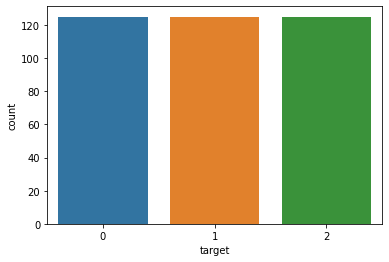

In [35]:
sn.countplot(dataset['target'])


In [36]:
'''# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()'''

'# Correlation Matrix\ncorrMatrix= dataset.corr()\n\nfig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches\n\nsn.heatmap(corrMatrix, annot=True,linewidth=0.8)\nplt.show()'

In [8]:
X_train = dataset.loc[:,dataset.columns!='target']
y_train = dataset['target']

X_test = test.loc[:,test.columns!='target']
y_test = test['target']


In [9]:
from sklearn.preprocessing import MinMaxScaler


scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)


scalingtest = MinMaxScaler(feature_range=(-1, 1)).fit(X_test)
X_test = scalingtest.transform(X_test)

### Building Models

Defining Function for Model Performance evaluation

In [10]:
def eval_result(model_name,X,y,y_pred):
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    
    #plot_roc_curve(model_name, X, y)

    #plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


In [11]:
# user defined function to calculate model training time

def run_model(model,X_train,y_train,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0,early_stopping_rounds=10, eval_metric="logloss")
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0

    print(f'Time taken: {time_taken}')

### XGBOOST 

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
 
#xgb = XGBClassifier(objective='multi:softmax',num_class=3)

xgb = XGBClassifier(random_state=0,objective='multi:softmax')

params = {
   "learning_rate"   : [0.01,0.1,0.8],
    #"max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    #"min_child_weight": [1, 3, 5, 7],
    #"gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4],
    #"colsample_bytree": [0.3, 0.4, 0.5, 0.7],
    "n_estimators":[1,10,100,1000]
}


clf = RandomizedSearchCV(xgb ,
                         param_distributions = params, 
                         cv=5,
                         scoring="accuracy",
                         n_jobs= 10,
                         verbose = 1,
                         random_state=786)
run_model(clf,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  4.5min finished


Time taken: 319.44237303733826


In [43]:
print(clf.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=10,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [13]:
y_predtest= clf.predict(X_test)

y_predtrain = clf.predict(X_train)

accuracy is 0.9733333333333334
              precision    recall  f1-score   support

           0    0.96850   0.98400   0.97619       125
           1    0.95385   0.99200   0.97255       125
           2    1.00000   0.94400   0.97119       125

    accuracy                        0.97333       375
   macro avg    0.97412   0.97333   0.97331       375
weighted avg    0.97412   0.97333   0.97331       375



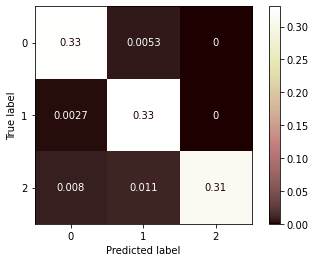

In [14]:
eval_result(clf,X_train,y_train,y_predtrain)

accuracy is 0.9733333333333334
              precision    recall  f1-score   support

           0    0.96850   0.98400   0.97619       125
           1    0.95385   0.99200   0.97255       125
           2    1.00000   0.94400   0.97119       125

    accuracy                        0.97333       375
   macro avg    0.97412   0.97333   0.97331       375
weighted avg    0.97412   0.97333   0.97331       375



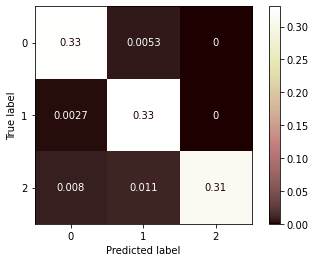

In [15]:
eval_result(clf,X_test,y_test,y_predtest)

In [47]:
# checking if distribution in target variable in train and test data is identical

#https://towardsdatascience.com/why-you-may-be-getting-low-test-accuracy-try-this-simpstatistical-tests-30585b7ee4fa

from scipy import stats
stats.ks_2samp(y_train,y_test)


Ks_2sampResult(statistic=0.0, pvalue=1.0)

statistics low value tells us that distribution is not much different and pvalue is one which tells us we cannot reject the null hypothesis that the distributions are actually identical because the pvalue is not small enough 